In [9]:
from src.model_evaluation import interpret_model
import pandas as pd
import joblib
from matplotlib import pyplot as plt 
import seaborn as sns

In [10]:
data = pd.read_csv('../data/hd_data_preprocessed.csv')

In [11]:
X = data.drop('num', axis=1)
y = data['num']

In [12]:
models_info = joblib.load('../models/initial_models_info.joblib')

In [13]:
models_results = {}


Interpreting Rank 1 model: LightGBM


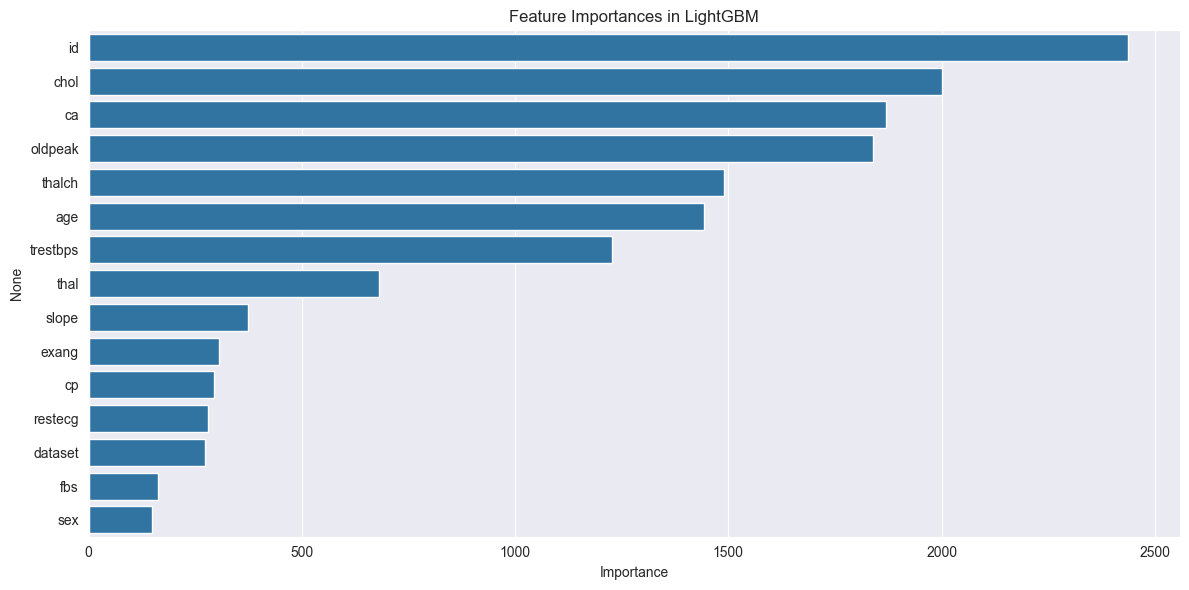

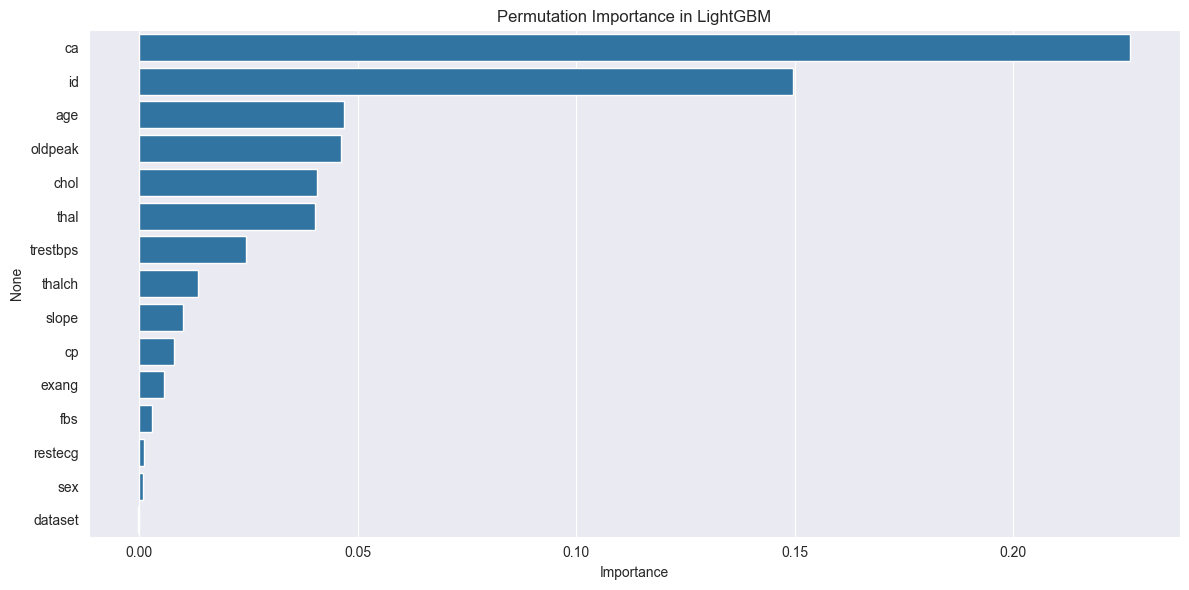


Top 10 most important features for LightGBM:
id          2437
chol        2002
ca          1870
oldpeak     1838
thalch      1490
age         1444
trestbps    1228
thal         681
slope        375
exang        306
dtype: int32

Top 10 features by permutation importance for LightGBM:
ca          0.226807
id          0.149650
age         0.046853
oldpeak     0.046154
chol        0.040793
thal        0.040326
trestbps    0.024476
thalch      0.013520
slope       0.010023
cp          0.007925
dtype: float64


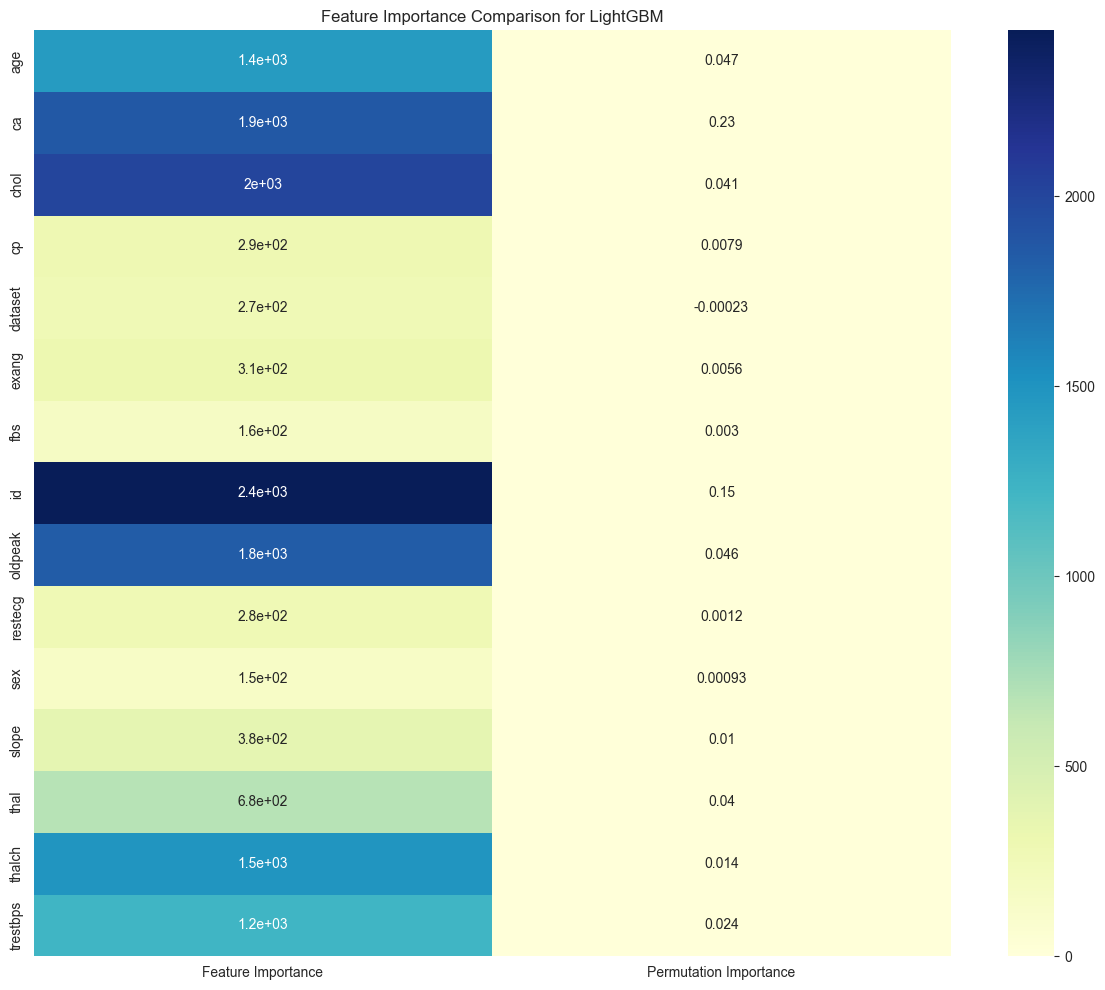


Interpreting Rank 2 model: Random Forest


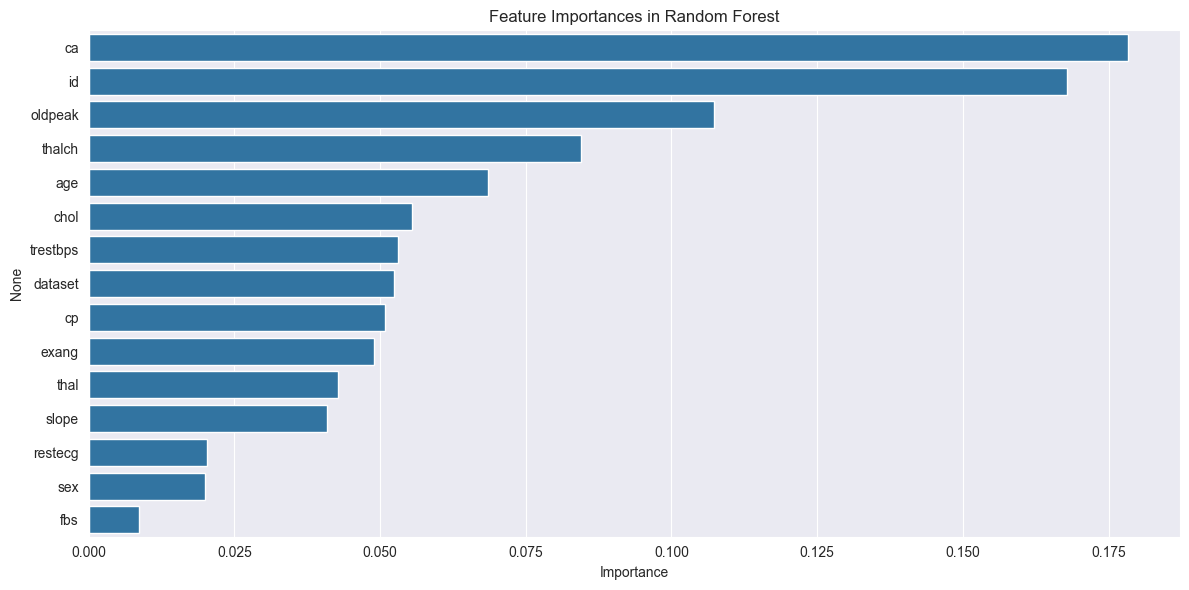

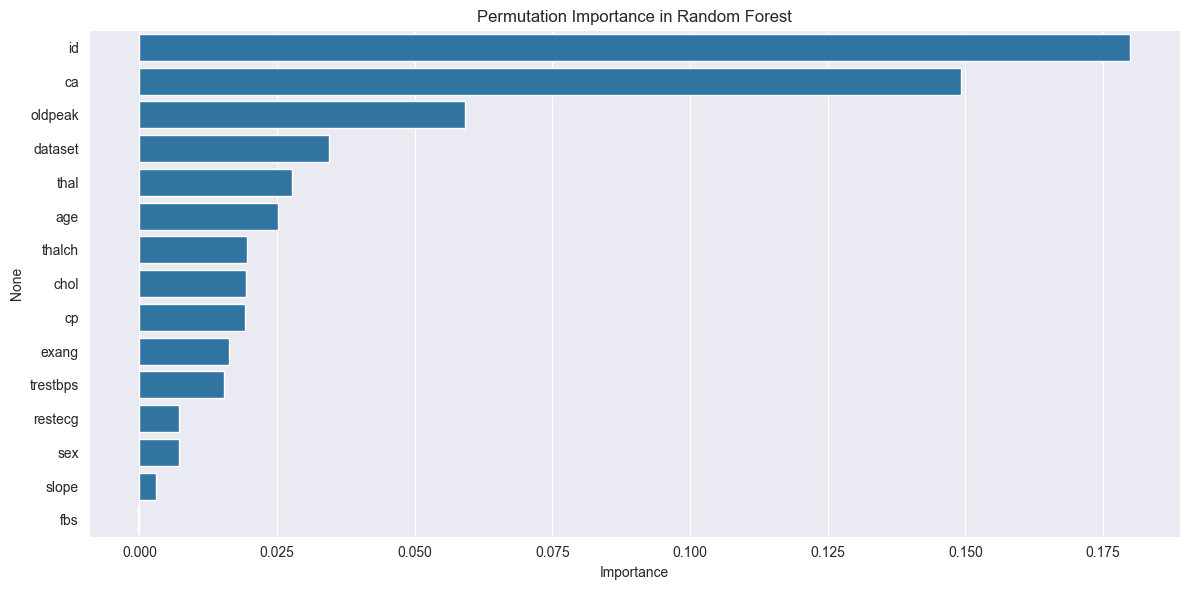


Top 10 most important features for Random Forest:
ca          0.178326
id          0.167930
oldpeak     0.107215
thalch      0.084455
age         0.068591
chol        0.055536
trestbps    0.053135
dataset     0.052470
cp          0.050938
exang       0.048890
dtype: float64

Top 10 features by permutation importance for Random Forest:
id         0.179953
ca         0.149184
oldpeak    0.059207
dataset    0.034499
thal       0.027739
age        0.025175
thalch     0.019580
chol       0.019347
cp         0.019114
exang      0.016317
dtype: float64


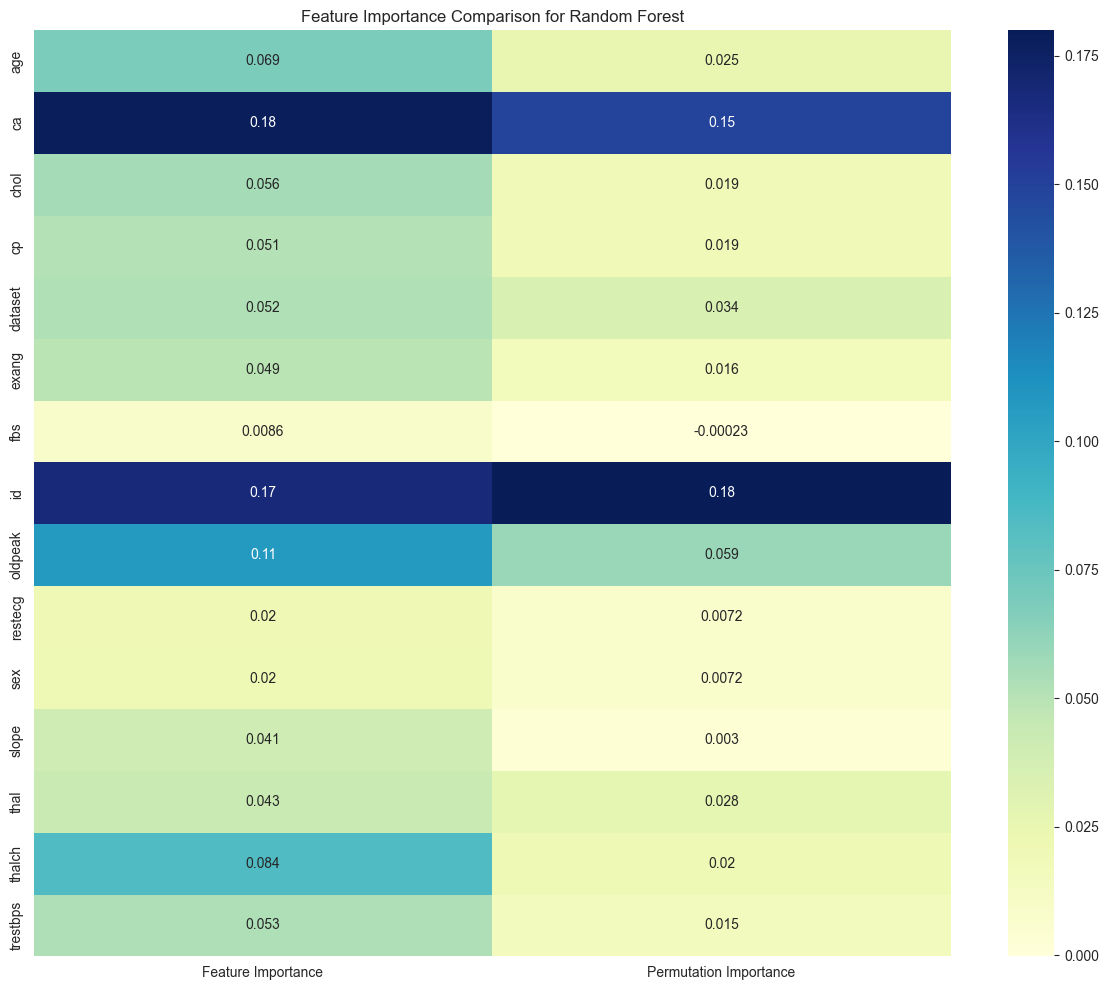


Interpreting Rank 3 model: Gradient Boosting


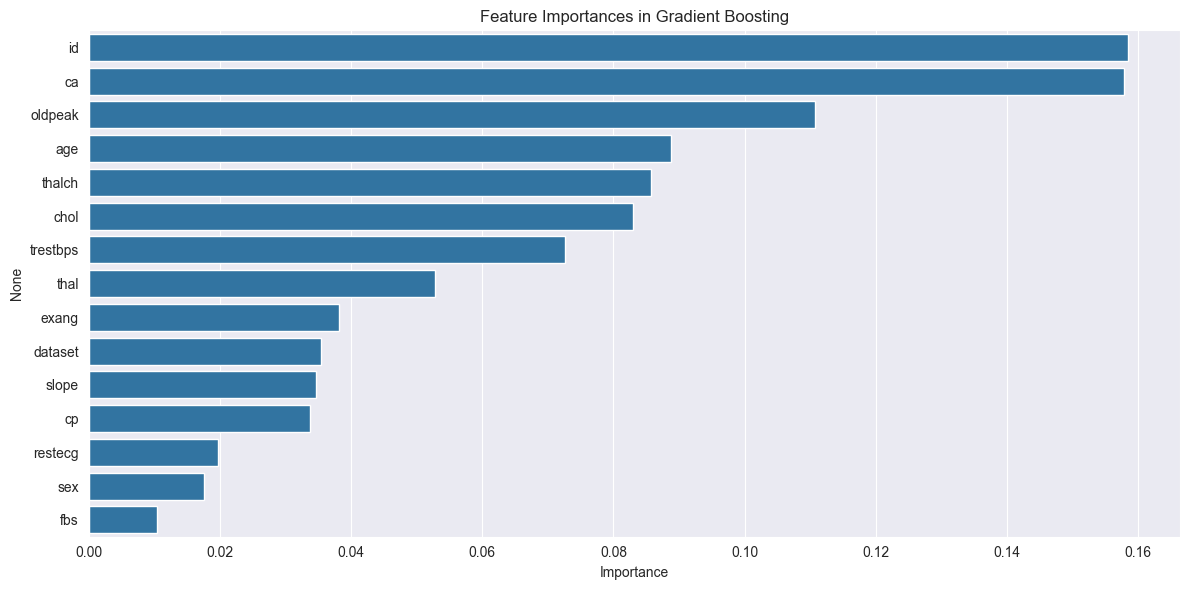

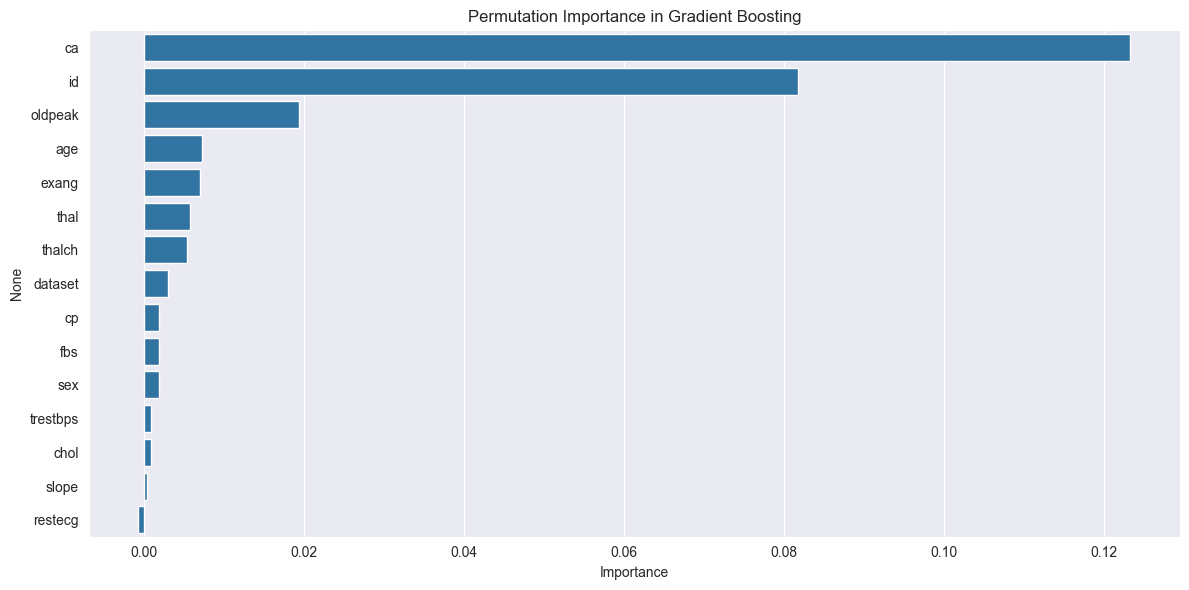


Top 10 most important features for Gradient Boosting:
id          0.158431
ca          0.157876
oldpeak     0.110798
age         0.088787
thalch      0.085747
chol        0.082957
trestbps    0.072647
thal        0.052805
exang       0.038223
dataset     0.035420
dtype: float64

Top 10 features by permutation importance for Gradient Boosting:
ca         0.123310
id         0.081818
oldpeak    0.019347
age        0.007226
exang      0.006993
thal       0.005828
thalch     0.005361
dataset    0.003030
cp         0.001865
fbs        0.001865
dtype: float64


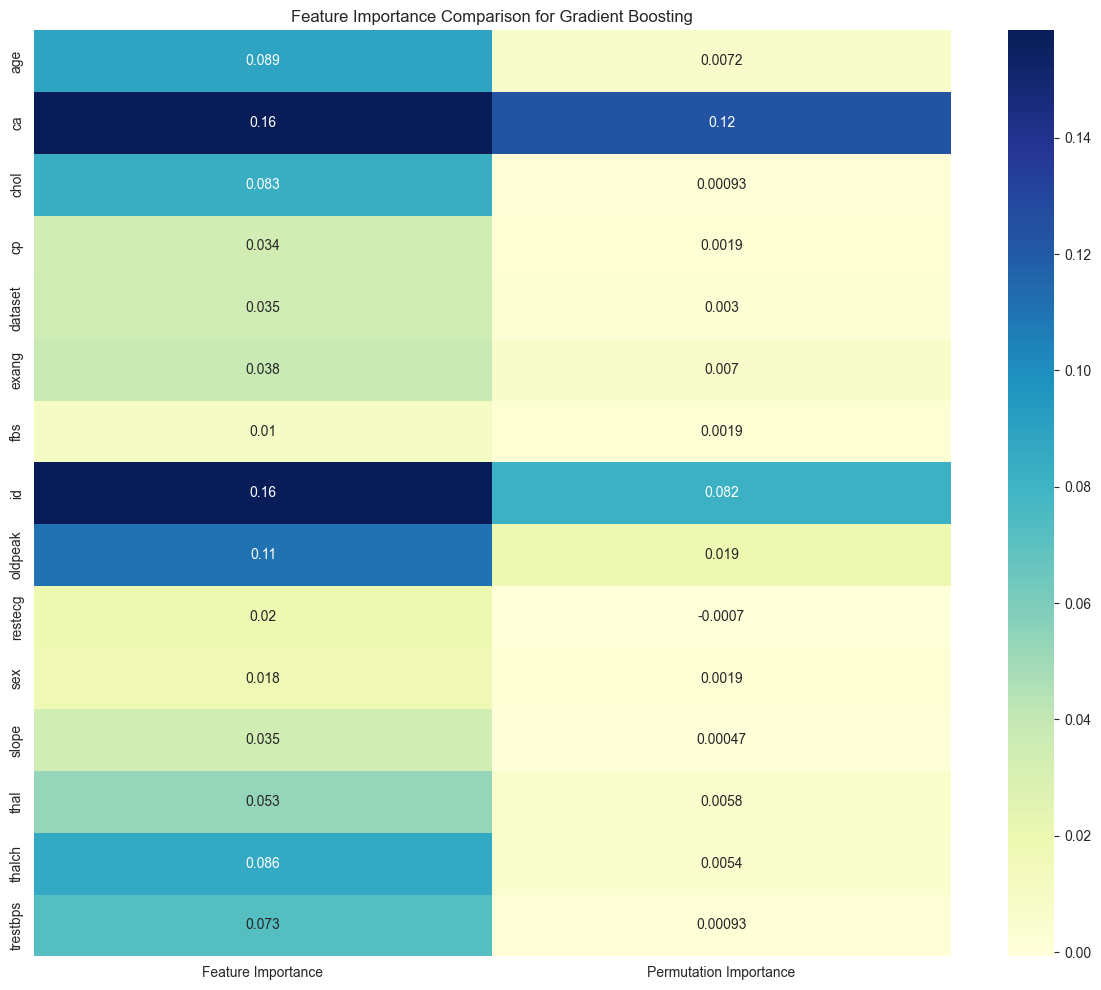


Interpreting Rank 4 model: XGBoost


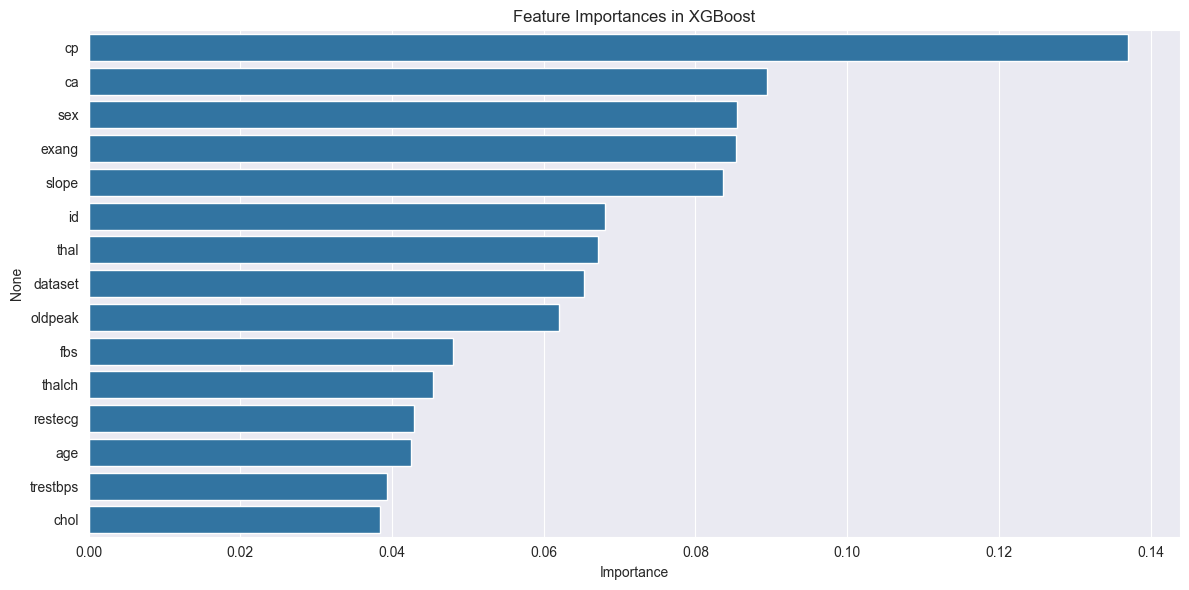

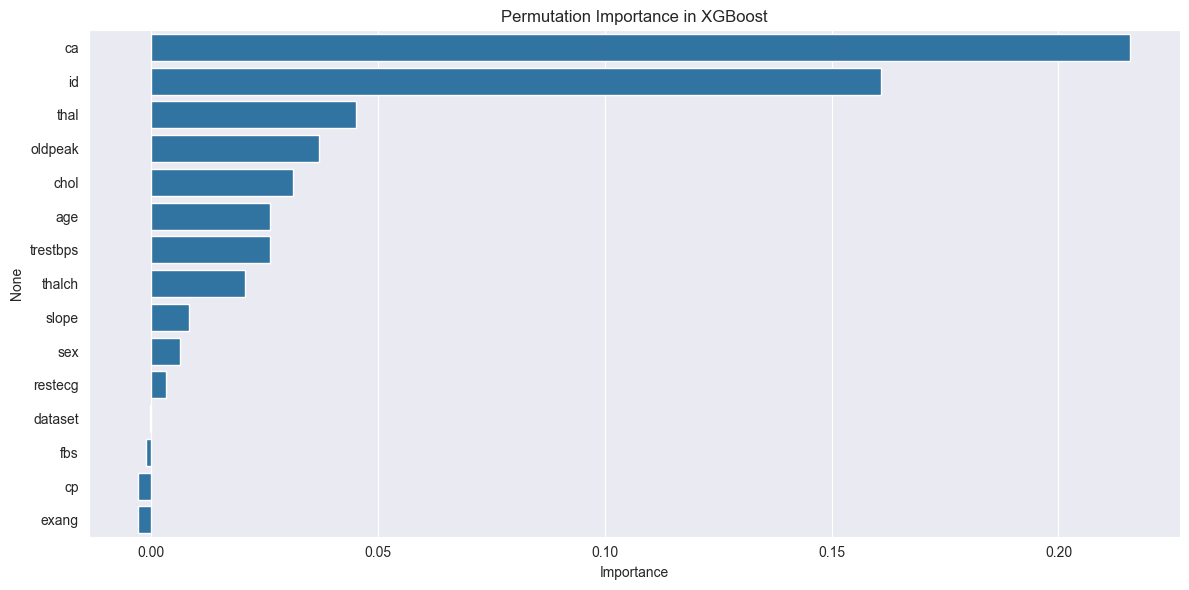


Top 10 most important features for XGBoost:
cp         0.137012
ca         0.089449
sex        0.085523
exang      0.085298
slope      0.083575
id         0.068103
thal       0.067216
dataset    0.065316
oldpeak    0.062053
fbs        0.048016
dtype: float32

Top 10 features by permutation importance for XGBoost:
ca          0.215851
id          0.160839
thal        0.045221
oldpeak     0.037063
chol        0.031235
age         0.026340
trestbps    0.026340
thalch      0.020746
slope       0.008392
sex         0.006527
dtype: float64


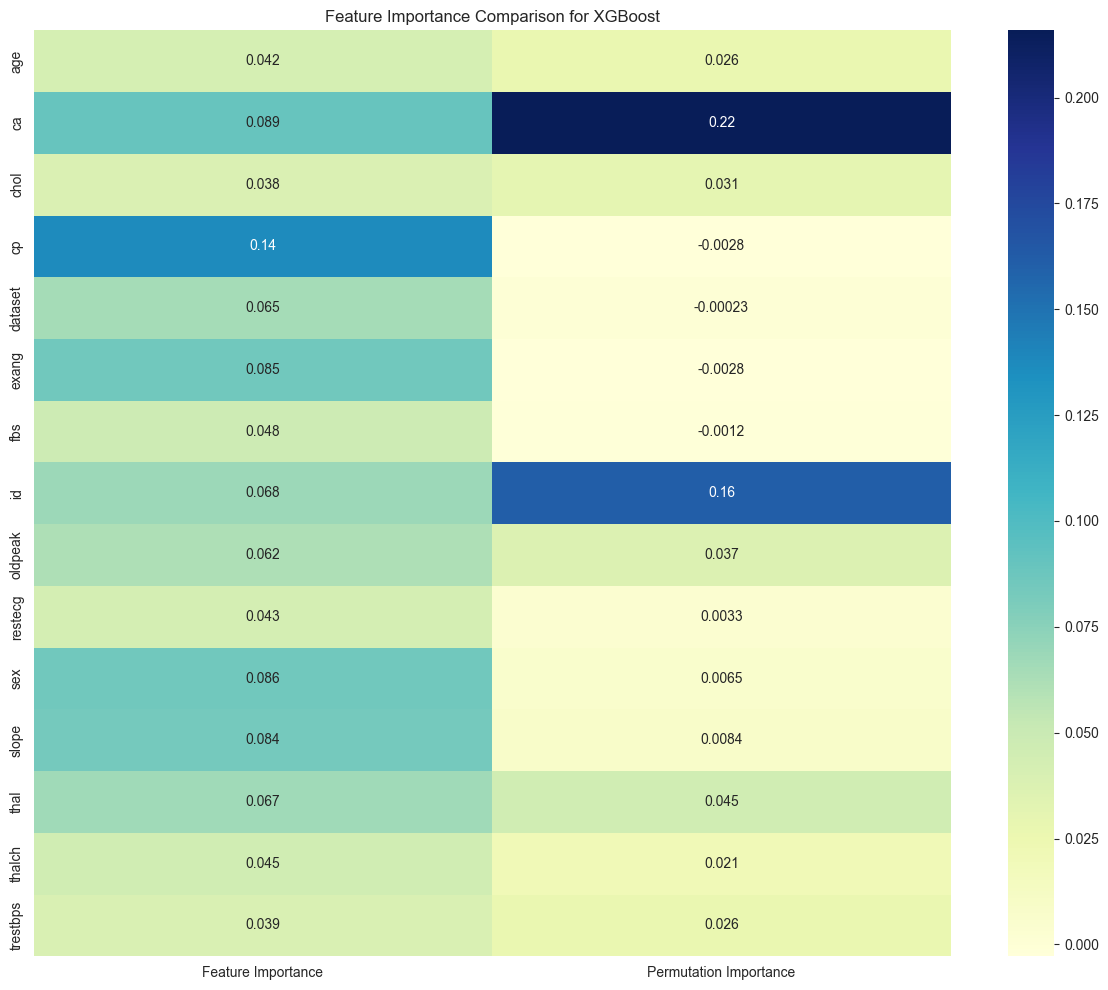


Interpreting Rank 7 model: Logistic Regression


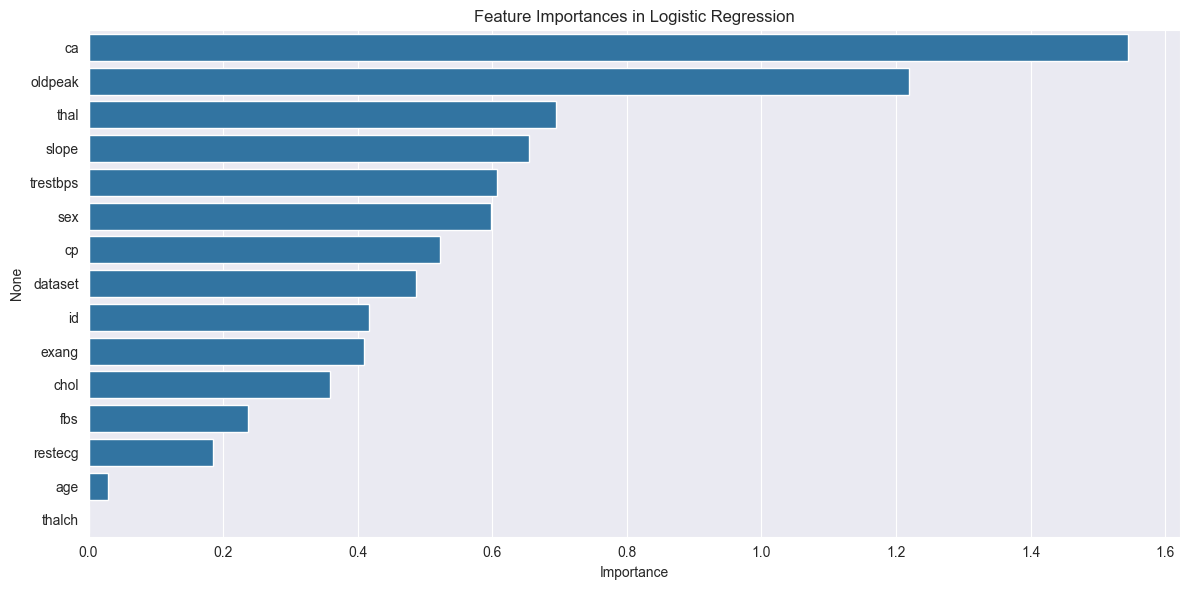

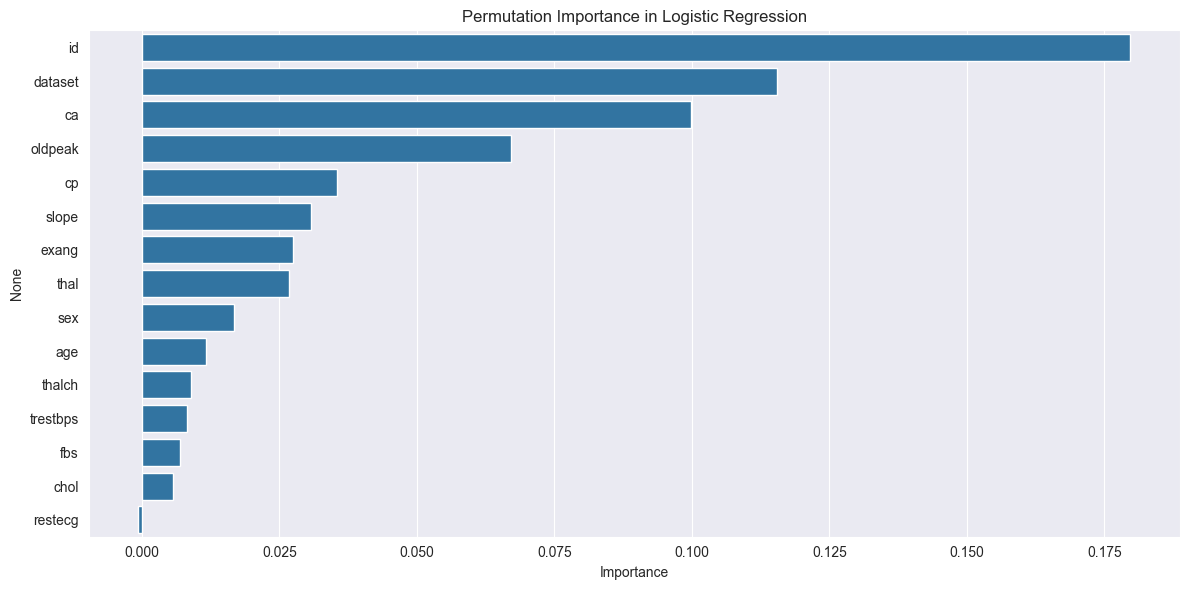


Top 10 most important features for Logistic Regression:
ca          1.544704
oldpeak     1.218848
thal        0.694049
slope       0.654737
trestbps    0.607576
sex         0.597710
cp          0.522225
dataset     0.486027
id          0.416613
exang       0.409766
dtype: float64

Top 10 features by permutation importance for Logistic Regression:
id         0.179720
dataset    0.115385
ca         0.099767
oldpeak    0.067133
cp         0.035431
slope      0.030769
exang      0.027506
thal       0.026807
sex        0.016783
age        0.011655
dtype: float64


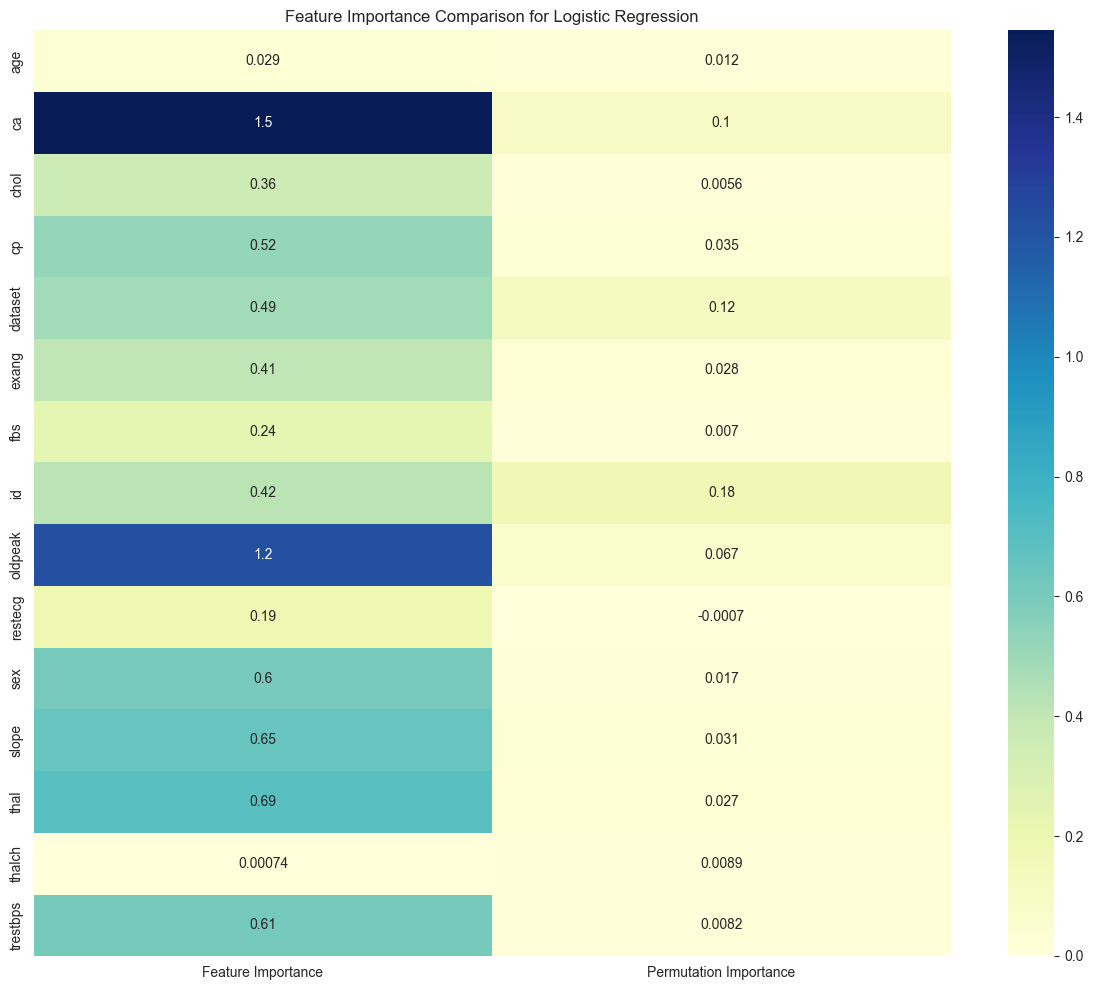

In [14]:
for model_name, info in models_info.items():
    print(f"\nInterpreting Rank {info['rank']} model: {model_name}")
    pipeline = info['pipeline']
    
    feature_names = X.columns.tolist()
    try:
        feature_importances, perm_importances = interpret_model(pipeline, X, y, feature_names, model_name)
        
        print(f"\nTop 10 most important features for {model_name}:")
        print(feature_importances.nlargest(10))
        
        print(f"\nTop 10 features by permutation importance for {model_name}:")
        print(perm_importances.nlargest(10))

        plt.figure(figsize=(12, 10))
        sns.heatmap(pd.DataFrame({
            'Feature Importance': feature_importances,
            'Permutation Importance': perm_importances
        }), annot=True, cmap='YlGnBu')
        plt.title(f'Feature Importance Comparison for {model_name}')
        plt.tight_layout()
        plt.show()

        models_results[model_name] = {
            'feature_importances': feature_importances,
            'perm_importances': perm_importances
        }

    except Exception as e:
        print(f"An error occurred while interpreting {model_name}: {str(e)}")
        import traceback
        traceback.print_exc()

In [15]:
top_features = pd.DataFrame({
    f"{model_name}_{method}": results[f'{method}_importances'].nlargest(10).index
    for model_name, results in models_results.items()
    for method in ['feature', 'perm']
})

print("\nTop 10 features comparison across models and methods:")
print(top_features)


Top 10 features comparison across models and methods:
  LightGBM_feature LightGBM_perm Random Forest_feature Random Forest_perm  \
0               id            ca                    ca                 id   
1             chol            id                    id                 ca   
2               ca           age               oldpeak            oldpeak   
3          oldpeak       oldpeak                thalch            dataset   
4           thalch          chol                   age               thal   
5              age          thal                  chol                age   
6         trestbps      trestbps              trestbps             thalch   
7             thal        thalch               dataset               chol   
8            slope         slope                    cp                 cp   
9            exang            cp                 exang              exang   

  Gradient Boosting_feature Gradient Boosting_perm XGBoost_feature  \
0                        id

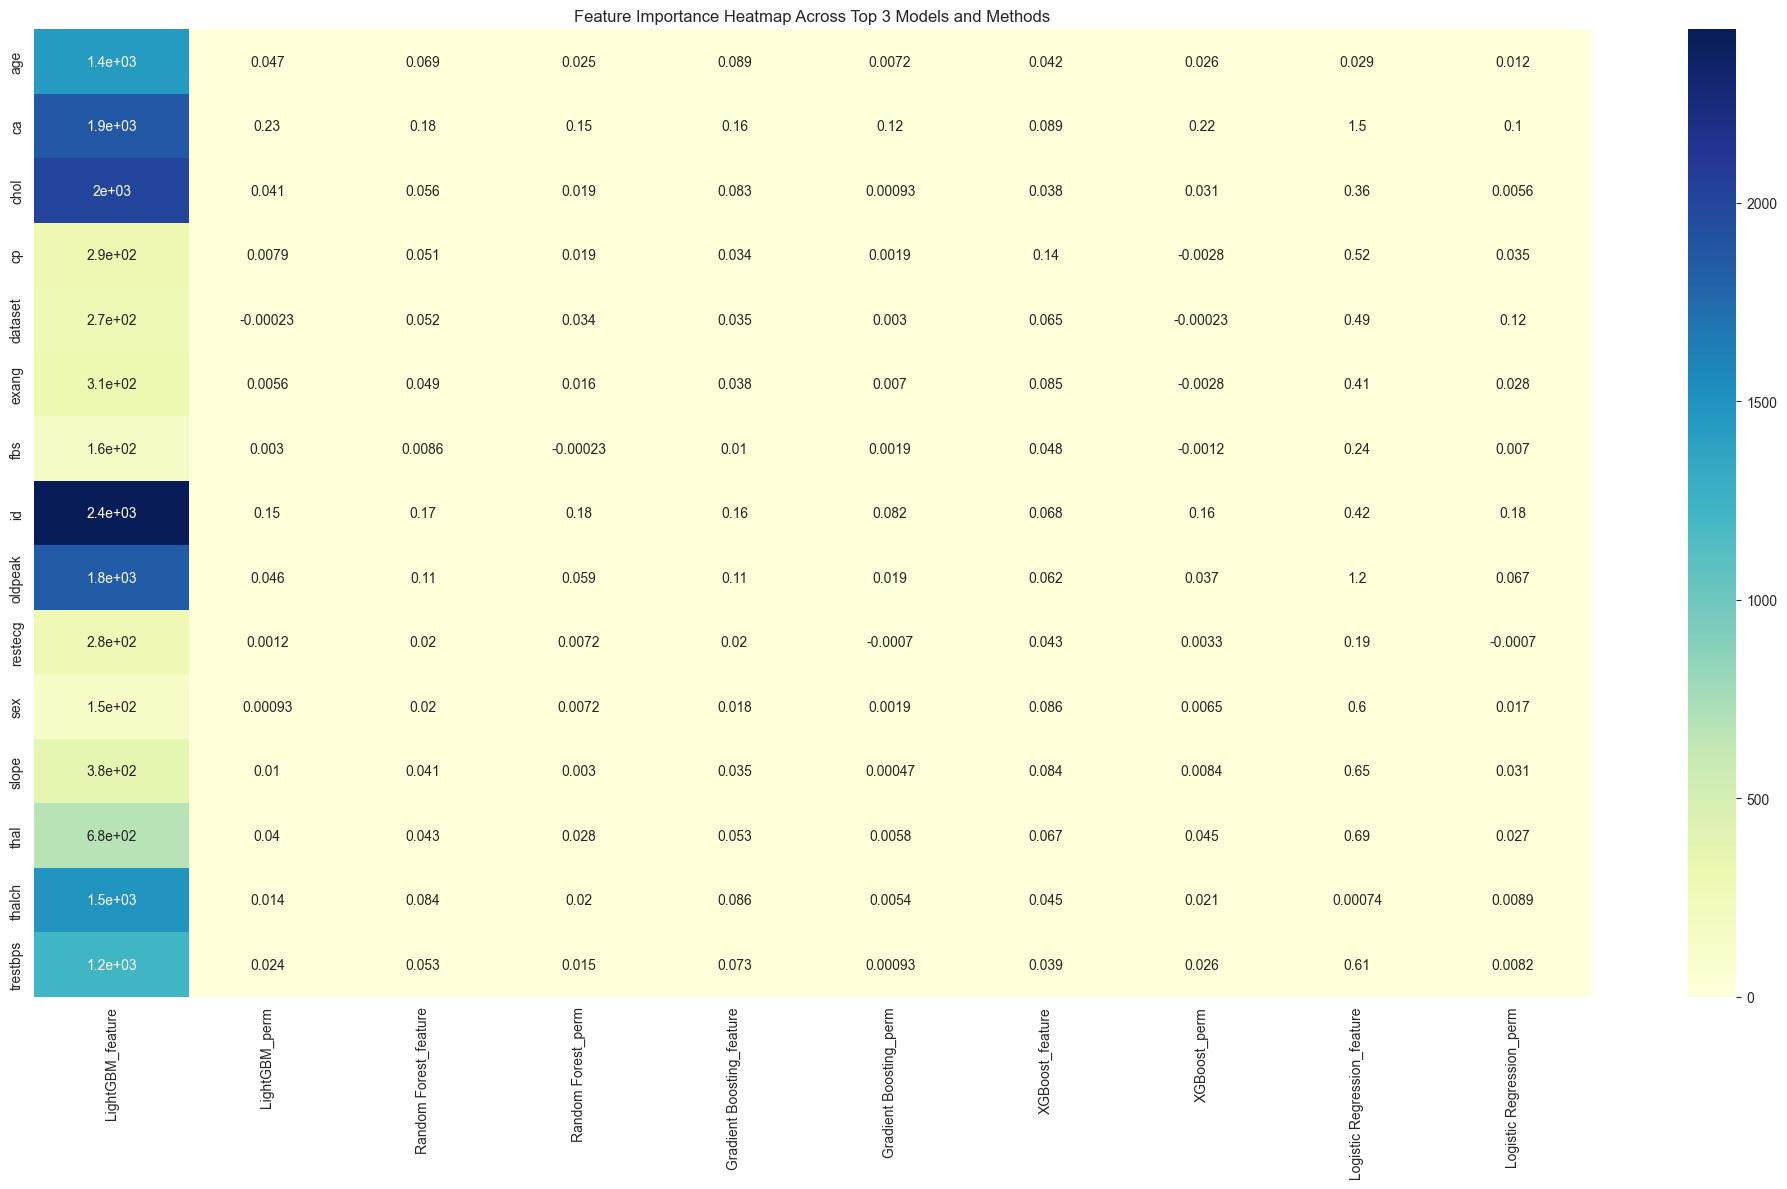

In [16]:
importance_heatmap = pd.DataFrame({
    f"{model_name}_{method}": results[f'{method}_importances']
    for model_name, results in models_results.items()
    for method in ['feature', 'perm']
})

plt.figure(figsize=(20, 12))
sns.heatmap(importance_heatmap, annot=True, cmap='YlGnBu')
plt.title('Feature Importance Heatmap Across Top 3 Models and Methods')
plt.tight_layout()
plt.show()